In [1]:
# Program to visualize binning in dataset

# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as spstats

In [2]:
# Loading the dataset
df = pd.read_csv("2016-FCC-New-Coders-Survey-Data.csv")
df[['ID.x', 'Age', 'Income']].head()

,ID.x,Age,Income
0,cef35615d61b202f1dc794ef2746df14,28.0,32000.0
1,323e5a113644d18185c743c241407754,22.0,15000.0
2,b29a1027e5cd062e654a63764157461d,19.0,48000.0
3,04a11e4bcb573a1261eb0d9948d32637,26.0,43000.0
4,9368291c93d5d5f5c8cdb1a575e18bec,20.0,6000.0


<h3><b>Fixed-Width Binning<\h3>

Text(0, 0.5, 'Frequency')

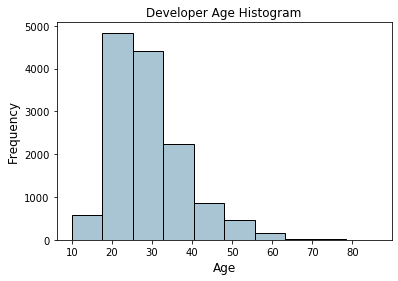

In [3]:
# Fix width binning
fig, ax = plt.subplots()
df['Age'].hist(color='#A9C5D3', edgecolor='black',  
                          grid=False)
ax.set_title('Developer Age Histogram', fontsize=12)
ax.set_xlabel('Age', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

<h4><b>Binning by rounding</b></h4>

In [4]:
df['Age_bin_round'] = np.array(np.floor(
                              np.array(df['Age']) / 10.))
df[['ID.x', 'Age', 'Age_bin_round']].iloc[1071:1076]

,ID.x,Age,Age_bin_round
1071,16a328da44ceb840863031f35dd3923e,22.0,2.0
1072,54bda0adcf9aa98fa0b3f9b5f608c851,21.0,2.0
1073,0c74ada07ff4ea3f1bf48b4fd79159f9,40.0,4.0
1074,87f04e2ef23e2c517c73e438da1867b1,34.0,3.0
1075,7a2c672065d3802525c733efc1b16219,29.0,2.0


 
   <h4><b> Custom age range binning</b> </h4>
   <table align='left'>
        <tr>
            <th> Age Range </th>
            <th> Bin </th>
        </tr>
        <tr>
            <td> 0 - 15 </td>
            <td> 1 </td>
        </tr>
        <tr>
            <td> 16 - 30 </td>
            <td> 2 </td>
        </tr>
        <tr>
            <td> 31 - 45 </td>
            <td> 3 </td>
        </tr>
        <tr>
            <td> 46 - 60 </td>
            <td> 4 </td>
        </tr>
        <tr>
            <td> 61 - 75 </td>
            <td> 5 </td>
        </tr>
        <tr>
            <td> 76 - 100 </td>
            <td> 6 </td>
        </tr>
    </table>


In [5]:
bin_ranges = [0, 15, 30, 45, 60, 75, 100]
bin_names = [1, 2, 3, 4, 5, 6]

df['Age_bin_custom_range'] = pd.cut(
                                np.array(
                                    df['Age']), 
                                    bins=bin_ranges)

df['Age_bin_custom_label'] = pd.cut(
                                np.array(
                                    df['Age']), 
                                    bins=bin_ranges,            
                                    labels=bin_names)

# view the binned features 
df[['ID.x', 'Age', 'Age_bin_round', 
            'Age_bin_custom_range',   
            'Age_bin_custom_label']].iloc[1071:1076]

,ID.x,Age,Age_bin_round,Age_bin_custom_range,Age_bin_custom_label
1071,16a328da44ceb840863031f35dd3923e,22.0,2.0,"(15, 30]",2
1072,54bda0adcf9aa98fa0b3f9b5f608c851,21.0,2.0,"(15, 30]",2
1073,0c74ada07ff4ea3f1bf48b4fd79159f9,40.0,4.0,"(30, 45]",3
1074,87f04e2ef23e2c517c73e438da1867b1,34.0,3.0,"(30, 45]",3
1075,7a2c672065d3802525c733efc1b16219,29.0,2.0,"(15, 30]",2


<h4><b>Adaptive Binning</b></h4>

Text(0, 0.5, 'Frequency')

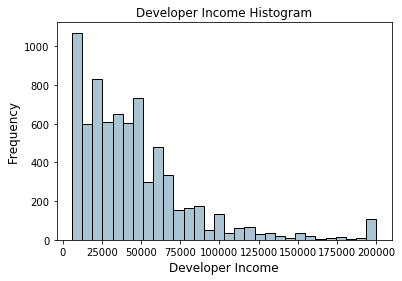

In [6]:
fig, ax = plt.subplots()
df['Income'].hist(bins=30, color='#A9C5D3', 
                        edgecolor='black', grid=False)
ax.set_title('Developer Income Histogram', fontsize=12)
ax.set_xlabel('Developer Income', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

In [7]:
quantile_list = [0, .25, .5, .75, 1.]
quantiles = df['Income'].quantile(quantile_list)
quantiles

0.00      6000.0
0.25     20000.0
0.50     37000.0
0.75     60000.0
1.00    200000.0
Name: Income, dtype: float64

Text(0, 0.5, 'Frequency')

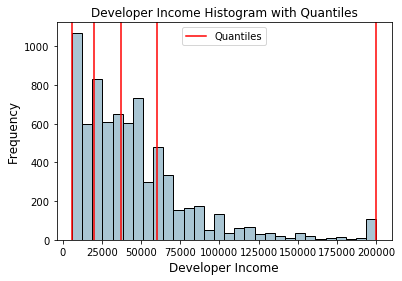

In [8]:
fig, ax = plt.subplots()
df['Income'].hist(bins=30, color='#A9C5D3', 
                        edgecolor='black', grid=False)
for quantile in quantiles:
    qvl = plt.axvline(quantile, color='r')
ax.legend([qvl], ['Quantiles'], fontsize=10)
ax.set_title('Developer Income Histogram with Quantiles', 
             fontsize=12)
ax.set_xlabel('Developer Income', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

In [9]:
quantile_labels = ['0-25Q', '25-50Q', '50-75Q', '75-100Q']
df['Income_quantile_range'] = pd.qcut(
                                    df['Income'], 
                                    q=quantile_list)
df['Income_quantile_label'] = pd.qcut(
                                    df['Income'], 
                                    q=quantile_list,       
                                    labels=quantile_labels)

df[['ID.x', 'Age', 'Income', 'Income_quantile_range', 
               'Income_quantile_label']].iloc[4:9]

,ID.x,Age,Income,Income_quantile_range,Income_quantile_label
4,9368291c93d5d5f5c8cdb1a575e18bec,20.0,6000.0,"(5999.999, 20000.0]",0-25Q
5,dd0e77eab9270e4b67c19b0d6bbf621b,34.0,40000.0,"(37000.0, 60000.0]",50-75Q
6,7599c0aa0419b59fd11ffede98a3665d,23.0,32000.0,"(20000.0, 37000.0]",25-50Q
7,6dff182db452487f07a47596f314bddc,35.0,40000.0,"(37000.0, 60000.0]",50-75Q
8,9dc233f8ed1c6eb2432672ab4bb39249,33.0,80000.0,"(60000.0, 200000.0]",75-100Q


<h1><b> Smoothing

In [10]:
s_df = pd.read_csv('daily-total-female-births.csv')
s_df.head()

,DateOfBirth,Births
0,1/1/1959,35
1,1/2/1959,32
2,1/3/1959,30
3,1/4/1959,31
4,1/5/1959,44


Text(0, 0.5, 'No of Birth')

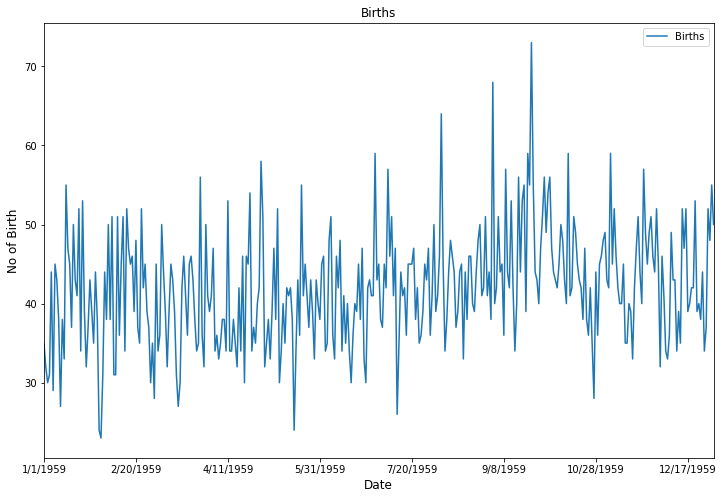

In [11]:
fig, ax = plt.subplots()
s_df.plot(x='DateOfBirth', y='Births', ax=ax, figsize=(12,8))
ax.set_title('Births', fontsize=12)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('No of Birth', fontsize=12)

   Births
0     NaN
1     NaN
2     NaN
3   32.00
4   34.25
5   33.50
6   37.25
7   40.25
8   38.75
9   38.25


Text(0, 0.5, 'No of Birth')

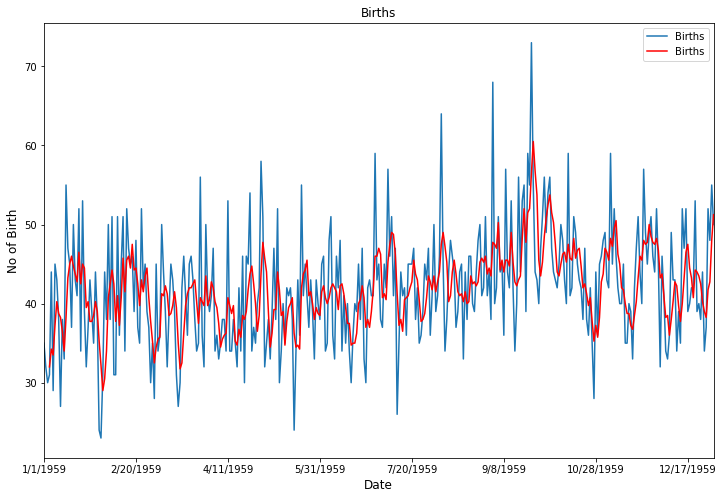

In [12]:
rolling = s_df.rolling(window=4)
rolling_mean = rolling.mean()
print(rolling_mean.head(10))

fig, ax = plt.subplots()
s_df.plot(x='DateOfBirth', y='Births', ax=ax, figsize=(12,8))
rolling_mean.plot(ax=ax, figsize=(12,8), color='red')
ax.set_title('Births', fontsize=12)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('No of Birth', fontsize=12)

<h3><b> Outliers

In [13]:
from sklearn.datasets import load_boston
boston = load_boston()
x = boston.data
y = boston.target
columns = boston.feature_names
#create the dataframe
boston_df = pd.DataFrame(boston.data)
boston_df.columns = columns
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


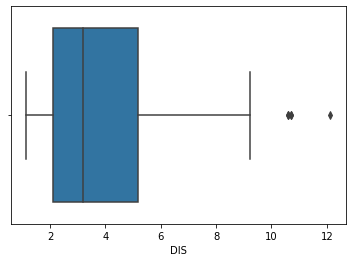

In [14]:
import seaborn as sns
sns.boxplot(x=boston_df['DIS'])

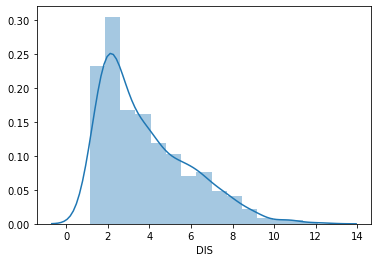

In [15]:
sns.distplot(boston_df['DIS'])

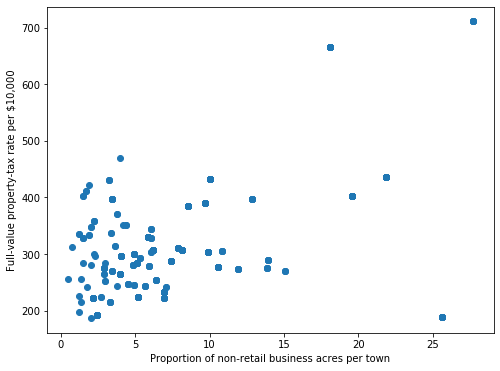

In [16]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(boston_df['INDUS'], boston_df['TAX'])
ax.set_xlabel('Proportion of non-retail business acres per town')
ax.set_ylabel('Full-value property-tax rate per $10,000')
plt.show()

<h4><b> Working with outliers: Correcting, Removing

<h4><b>Z-Score</b></h4>
    The <b>Z-score</b> is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured.

In [17]:
z = np.abs(spstats.zscore(boston_df))
print(z)

[[0.41978194 0.28482986 1.2879095  ... 1.45900038 0.44105193 1.0755623 ]
 [0.41733926 0.48772236 0.59338101 ... 0.30309415 0.44105193 0.49243937]
 [0.41734159 0.48772236 0.59338101 ... 0.30309415 0.39642699 1.2087274 ]
 ...
 [0.41344658 0.48772236 0.11573841 ... 1.17646583 0.44105193 0.98304761]
 [0.40776407 0.48772236 0.11573841 ... 1.17646583 0.4032249  0.86530163]
 [0.41500016 0.48772236 0.11573841 ... 1.17646583 0.44105193 0.66905833]]


In [18]:
threshold = 3
print(np.where(z > threshold))

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
       200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
       220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
       277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
       357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
       380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
       416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
       437, 438, 445, 450, 454, 455, 456, 457, 466], dtype=int64), array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
        1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
        5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
        3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
        0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
       11,  0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11

In [19]:
# print outlier
print(z[55][1])

3.375038763517309


In [20]:
# remove outliers 
print(boston_df.shape)
boston_df_o = boston_df[(z < threshold).all(axis=1)]
print(boston_df_o.shape)

(506, 13)
(415, 13)


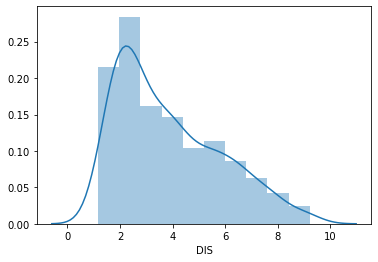

In [21]:
# plot after removing outliers
sns.distplot(boston_df_o['DIS'])

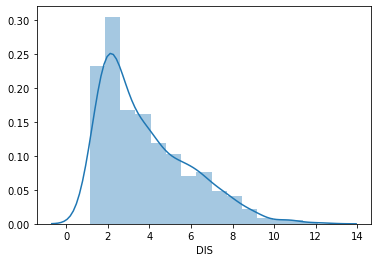

In [22]:
sns.distplot(boston_df['DIS'])